<a href="https://colab.research.google.com/github/kasmintalukdar/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Final_by_kasmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Play Store App Review Analysis

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

   Nowadays, mobile apps are becoming one of the most fundamental parts of our life. With the rapid increase in app usage, The app market is also growing exponentially. Currently, the Google play store is the most dominant android app marketplace. At this time, It contains more than 2.5 million apps and thousands of apps are launched every single day.

   Since a number of the dominant player with several quality apps are already present in the market, there is tough competition for newcomers. To survive and grow in this competitive market we need a great strategy. We have to find some answers from previous market insights. For example- in which niche should we create our app? Should we make our app free or paid? etc.

   To find the answer to many such questions we are going to do a detailed analysis of over ten thousand apps in Google Play across different categories.

Let's take a look at the datasets we are going to use for our analysis.

**Play Store Data.csv**- This dataset contains 13 features. Different features 
indicate a different property of an app. For example- the category of the app, Rating of the app, etc.


**Reviews. CSV**-This data set contain 5 features. The 'Translated_Review' feature contains the pre-processed review of each app. Based on these reviews there are three more features "Sentiment", "Sentiment_Polarity" and "Sentiment_Subjectivity".

# **🪕Play Store Data Analysis**

In [ ]:
# importing libraries
# numpy-for linear transformation
# pandas-for data manipulation and analysis
# matplotlib,seaborn,plotly-for visualization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading csv files
playstore_data_path = '/content/drive/MyDrive/Colab Notebooks/dat/Play Store Data.csv'
user_review_data_path = '/content/drive/MyDrive/Colab Notebooks/dat/User Reviews.csv'
playstore_df = pd.read_csv(playstore_data_path)
review_df = pd.read_csv(user_review_data_path)

# Exploring Playstore and User Review Dataframe.

### 1.Playstore Dataframe




In [ ]:
#shape of the play store dataset
playstore_df.shape

(10841, 13)

In [ ]:
#displaying first 5 rows of the dataset
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#displaying last 5 rows of the dataset
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# information about the features in the dataset
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Lets explore all the features in the Dataset 



1.   **App** - describes the name of each apps.
2.   **Category** - Category at which the app belongs.
3.   **Rating** -Average rating of the app received from its users.
4.   **Reviews** - The total number of reviews got by the apps from its users.
5.   **Size**- Memory size occupied by the app in the mobile device.            
6.   **Installs**- The total number of downloads for the application.
7.   **Type** - whether the app is free or paid
8.   **Price**-If the app is paid, what is the cost required to install the app. 
9.   **Content Rating** - It specifies weather the app is suitable for all age group or not.
10.  **Genres**- the other categories to which the app can belong.
11.  **Last Updated**- Last updated date of the app.
12.  **Current Ver**-The current version of the app.
13.  **Android Ver**-The Android Version which can support the application. 








### 2.Review Dataframe

In [ ]:
#shape of the Review dataset
review_df.shape

(64295, 5)

In [ ]:
#displaying first 5 rows of the dataset
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#displaying last 5 rows of the dataset
review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# information about the features in the dataset
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Lets explore all the features in the Dataset 



1.   **App** - describes the name of each apps.
2.   **Translated_Review**-English translation of the user reviews.
3.   **Sentiment** - It gives the emotion of the reviewer related with his review.It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4.   **Sentiment_Polarity** - The polarity of the review.It ranges from [-1 to 1]. -1 means "negative sentiment" and 1 means "positive sentiment" 
5.   **Sentiment_Subjectivity** - How the opinion of a particular reviewer is aligned with the opinion of the general public.It ranges from [0 to 1]. Heigher the subjectivity means the review is closer to the opinion of general public.

# **Data Cleaning**

##**Play Store Dataset**

In [ ]:
df = playstore_df.copy()

## 1- Converting "Review" column type from "object" to "int".


In [ ]:
df['Reviews']=df['Reviews'].apply(lambda x : eval(x))

SyntaxError: ignored

### While converting Reviews into "int" type we found some Error. Which show that one of the value in review column is 3.0M.So we have to remove that row from the data set.

In [ ]:
# Finding the row index of that value.
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### We have found that index no 10472 contain the value 3.0M.


In [ ]:
# Dropping that index value using drop method and reseting index again.
df = df.drop(10472).reset_index(drop=True)

In [ ]:
# Evaluating the values.
df['Reviews']=df['Reviews'].apply(lambda x : eval(x))

## 2- Converting "Size" type from "object" to "float".

In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### It is observed that "Size column contain values in MB (M), kb(k) and "Varies with device".


In [ ]:
df[df['Size']=='Varies with device'].shape

(1695, 13)

###In the size coloumn the sizes are in different units. Some of them are in 'M' means MB some of them are in 'K' means KB.For those which are in MB we just convert it to float after removing the 'M' charecter from it. For those which are in KB first we convert it to float after removing 'K from it than we convert it to MB by dividing it by **1024** 

### Again we can see there are **1695** rows that has **"Varies with device"** value in **"Size"** column. Replacing this value with mean value will affect the visualization. Replacing **Varies with device** value with np.NaN which is of float type.


In [ ]:
def converting_size_into_float(string):
  '''
  This function helps in removing 'M'(MB) and 'k'(kb) which are present at the end of the string and replace 'Varies with device' with np.NaN. This function also evaluate the values present. 
  '''
  
  if string[-1] == 'M':
    return eval(string.strip('M'))

  elif string[-1] == 'k':
    a =string.strip('k')
    b = str(round(eval(a)/1024,1))
    return eval(b)

  elif string == 'Varies with device':
    string = np.NaN  
    return string
  else:
    return eval(string)

In [ ]:
# Applying defined function.
df['Size_in_MB']= df['Size'].apply(lambda x : converting_size_into_float(x))

## 3- Converting "Install" type from "object to "int".

### In **Install** column values are of **object** type and contain '+' and ',' in them. So we are going remove '+' and ',' from the values and then convert them into **int** type using **eval** method.

In [ ]:
# Creating function to remove + and ,.
def remove_plus_and_comma(string):
  '''
  This function removes '+' and ',' from the string.
  '''
  string = string.replace(',','')
  string = string.strip('+')
  return string

In [ ]:
# Applying defined function on the column and evaluating those values.
df['Installs'] = df['Installs'].apply(lambda x: eval(remove_plus_and_comma(x)))

## 4- Converting "Price" type from "object" to "float".

### **Price** column value has $ symbol in them and they are of object type. we'll remove the symbol and change the type.  

In [ ]:
# Creating function to remove $ symbol.
def remove_sign(string):
  '''
  This function removes $ symbol from the string and convert given string data type from 'str' to 'float'.
  '''
  return round(float(string.strip('$')),2)

In [ ]:
# Applying the function.
df['price_in_dollar'] = df['Price'].apply(lambda x : remove_sign(x))

## 5- Converting **Last Update** type from "object" to "datetime".

In [ ]:
# Converting str into datetime formate using 'to_datetime' function.
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# **Handling the NaN values**

## 6- Handling Rating column 

In [ ]:
#checking the null value in Rating colunn
len(df[df['Rating'].isnull()]['Rating'])

1474

### Rating column contain 1474 NaN values. We cannot drop this much amount of row from dataset because it will lose a huge percentage of information.We gonna replace all the NaN values with the average of non-null values.

In [ ]:
# Finding average of non-null values from Rating column.
non_null_mean= round(df[~df['Rating'].isnull()]['Rating'].mean(),1)

In [ ]:
# Replacing null values with average rating.
df['Rating'].fillna(value= non_null_mean, inplace=True)


## 7- Removing Null value from "Type" column.

### **Type** column contain only one NaN value.

In [ ]:
df[df['Type'].isnull()]['Type']

9148    NaN
Name: Type, dtype: object

### It is observed that Type column contain Null value at index 9148.

In [ ]:
# Removing row having index 9148 and reseting the index.
df = df.drop(9148).reset_index(drop=True)

## 8- Removing Null values from "Current Ver".

In [ ]:
df[df['Current Ver'].isnull()]['Current Ver'].shape

(8,)

### Number of Null value present in the 'Current Ver' column is 8.


In [ ]:
# Removing the rows containing Null values from Dataframe.
df = df[~df['Current Ver'].isnull()]


## 9- Removing Null values from "Android Ver" column.

In [ ]:
len(df[df['Android Ver'].isnull()]['Android Ver'])

2

### Number of Null values present in the "Android Ver" column is 2.

In [ ]:
# Removing Rows containing Null value from dataframe.
df= df[~df['Android Ver'].isnull()]

### Android Ver type is of object and there are different values. we'll get the create another column in the Dataframe which will store the minimum android version for the App.

In [ ]:
# creating a function to obtain minimum version for the App.
def get_ver(string):
  '''
  This function is used to obtain minimum android version required.
  '''

  if string =='Varies with device':
    return eval('1.0')
  else:
    string = string[0:3]
    return eval(string)
  




In [ ]:
# Applying the function.
df['min_ver']=df['Android Ver'].apply(lambda x : get_ver(x))

## Checking and Removing Duplicate values from the data set.

### As we can see in the Dataframe only one column that contain **UNIQUE** value which cannot be repeate and that column is **App** column.

In [ ]:
# Creating temperory dataframe to find the number of duplicate apps.
a = df['App'].value_counts().reset_index()

In [ ]:
# Finding the number of duplicate rows.
len(a[a['App']>=2])

798

### As we can see above Dataframe contains 798 duplicate rows.

In [ ]:
# Removing DUPLICATES from the Dataframe.
df=df.drop_duplicates(subset = 'App')

Reseting index

In [ ]:
df=df.reset_index()

In [ ]:
df.drop(['index'],axis = 1,inplace=True)

In [ ]:
df.shape

(9648, 16)

### - After removing "Duplicates" and "NaN values" from the Dataframe we now have a modified Dataframe with 9648 rows and 16 columns.

##2.User Review dataset

In [ ]:
r_df = review_df.copy()

In [ ]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
r_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Handling Null values in User data review Dataframe.

In [ ]:
r_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
r_df[r_df['Translated_Review'].isnull()].shape

(26868, 5)

### There are 26868 Null Values in T**ranslated Review** column.

### Removing NaN values from **Translated_Review** column, cause the rows containing NaN values are of no use and we cannot impute null values for these column. 
### If there is no review then there will be no sentiment.
### Therefore, We will remove all the rows that contains NaN values in Translated_Review columm.

In [ ]:
r_df= r_df[~r_df['Translated_Review'].isnull()]

Reseting index

In [ ]:
r_df= r_df.reset_index()

In [ ]:
r_df.drop(['index'],axis=1,inplace=True)

In [ ]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


# **Data Visualization**

## Q1-Correlation Heatmap


In [ ]:
df.corr()

,Rating,Reviews,Installs,Size_in_MB,price_in_dollar,min_ver
Rating,1.000000,0.054032,0.038869,0.055865,-0.019378,-0.005648
Reviews,0.054032,1.000000,0.625158,0.179275,-0.007604,-0.092561
Installs,0.038869,0.625158,1.000000,0.134216,-0.009413,-0.134702
Size_in_MB,0.055865,0.179275,0.134216,1.000000,-0.022500,0.139515
price_in_dollar,-0.019378,-0.007604,-0.009413,-0.022500,1.000000,0.018573
min_ver,-0.005648,-0.092561,-0.134702,0.139515,0.018573,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

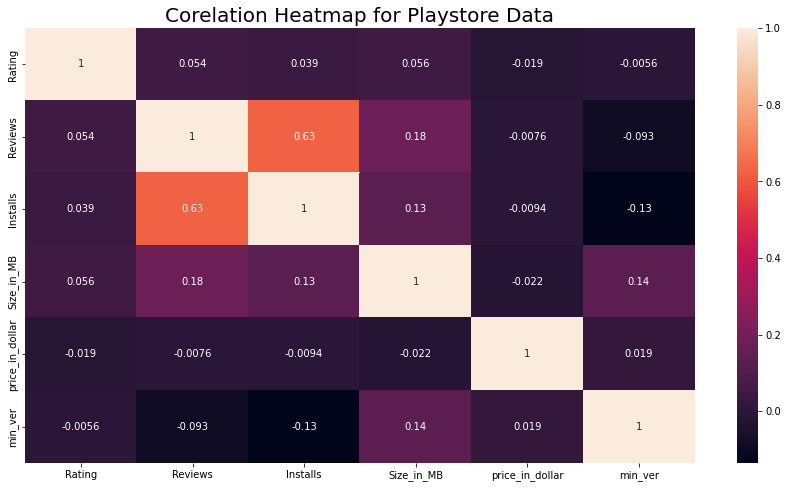

In [ ]:
# Heat map for play_store
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)